C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


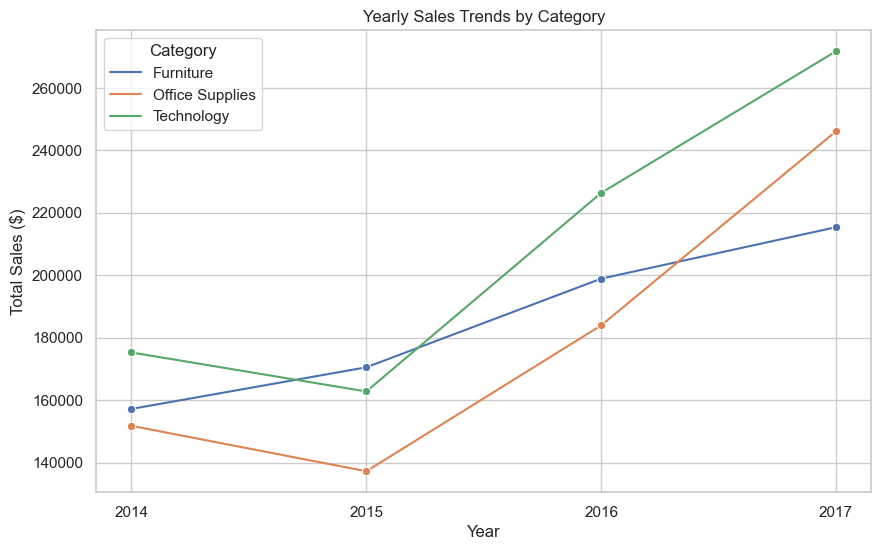

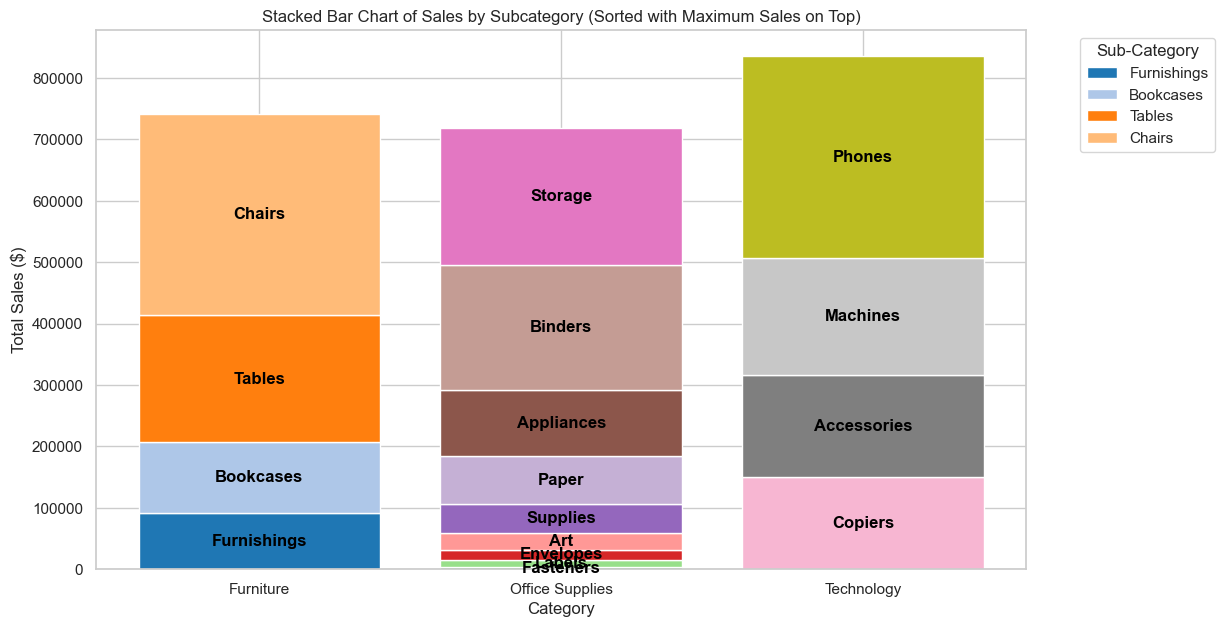

C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gangl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


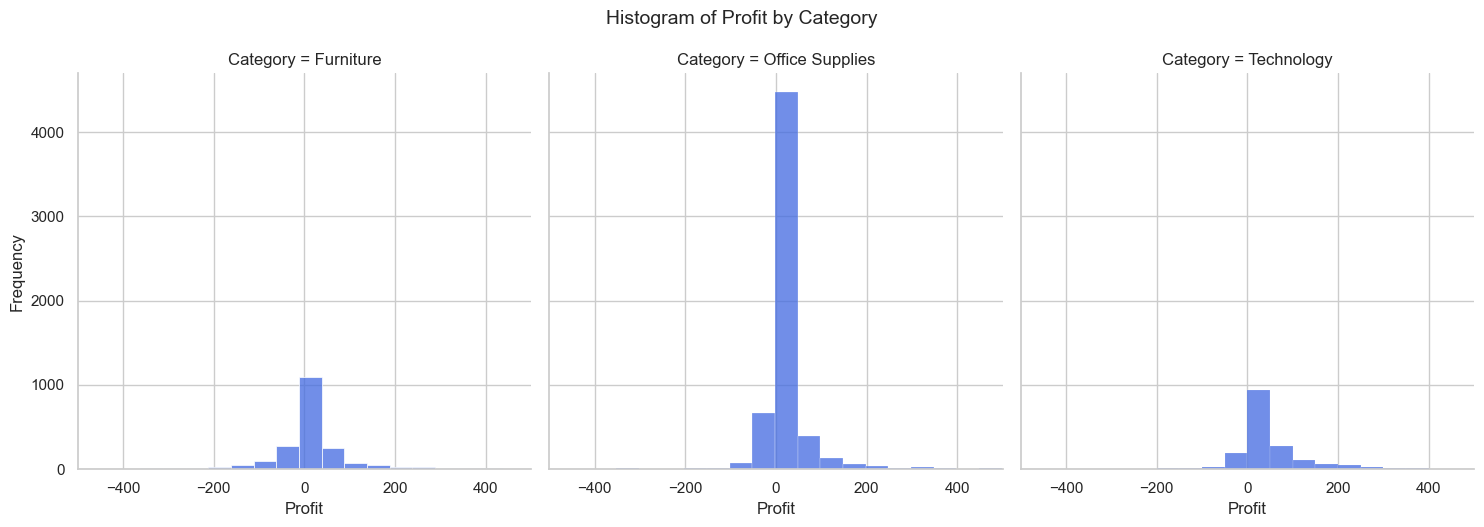

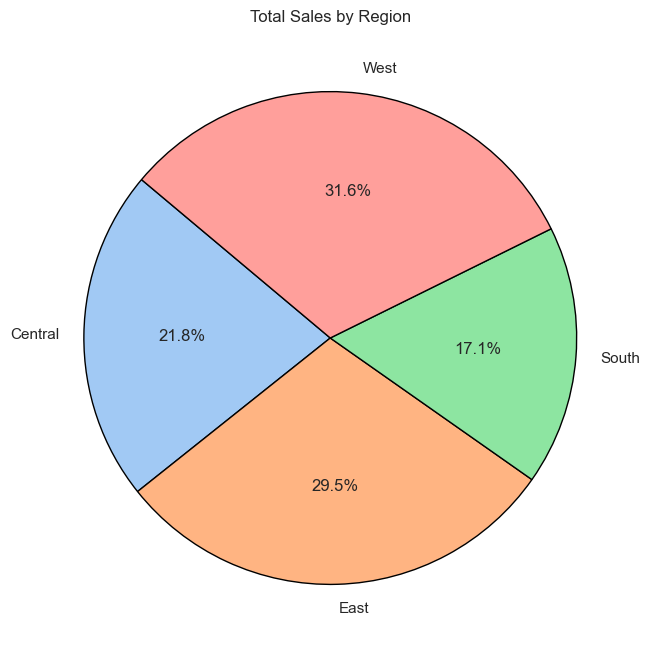

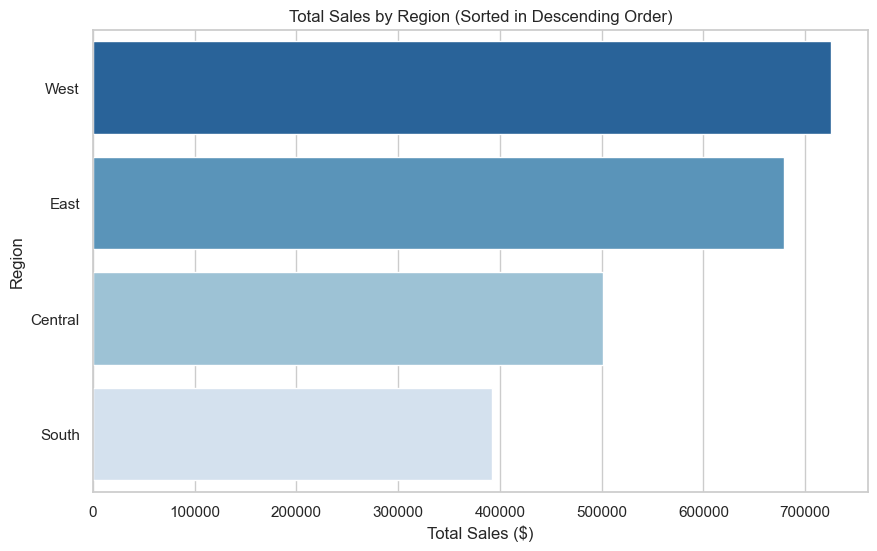

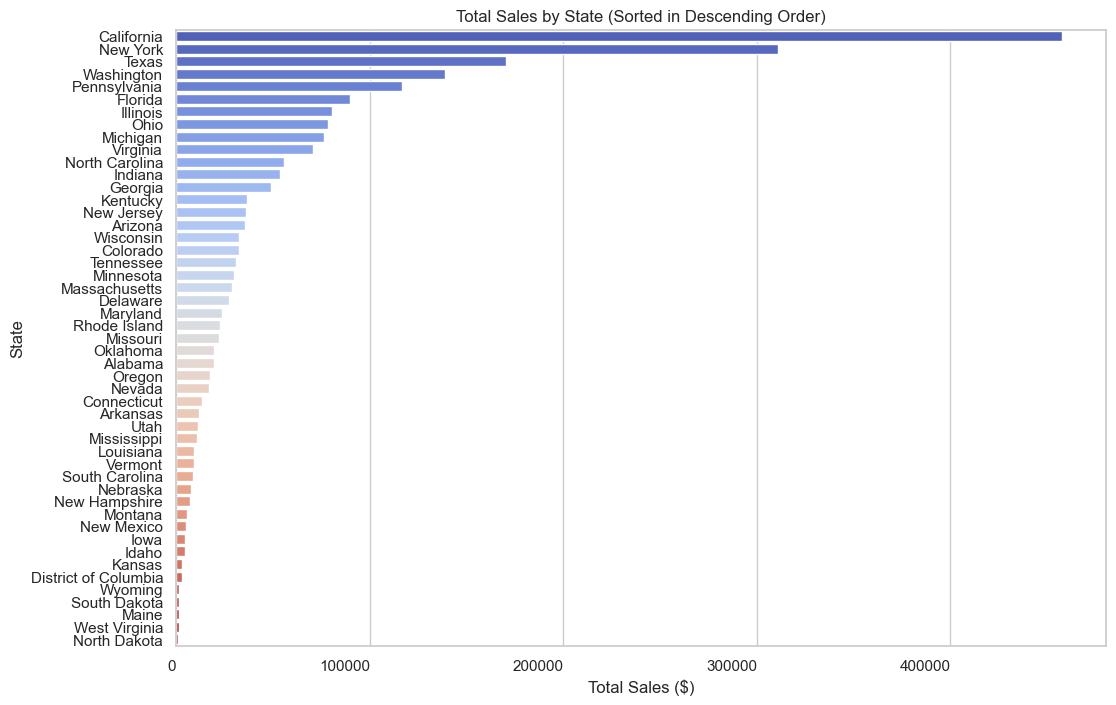

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/gangl/Documents/Python Scripts/Superstore_Sales.csv') 
'''
print(df.head())  # Display first 5 rows
print(df.info())  # Check column names and data types
'''

# Convert 'Date' column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Year'] = df['Order_Date'].dt.year

'''
print(df.head())  # Display first 5 rows
'''

# Group by 'Order_Year' and 'Category' to calculate total sales per year for each category
yearly_sales_summary = df.groupby(['Order_Year', 'Category'])['Sales'].sum().reset_index()

'''
# Display the summary
yearly_sales_summary.head()
'''

sns.set_theme(style="whitegrid")
# Create a line plot for sales trends over the years for each category
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order_Year', y='Sales', hue='Category', data=yearly_sales_summary, marker='o')

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.title("Yearly Sales Trends by Category")
plt.xticks(yearly_sales_summary['Order_Year'].unique())  # Ensure all years are shown

# Show the plot
plt.legend(title="Category")
plt.savefig("Sales Trending for Each Category.png", dpi=300, bbox_inches="tight")  # High-quality image
plt.show()

# Aggregate sales by Category and Sub-Category
subcategory_sales = df.groupby(['Category', 'Sub_Category'])['Sales'].sum().reset_index()

# Sort subcategories within each category by sales (ascending order, so max is on top)
subcategory_sales_sorted = subcategory_sales.sort_values(['Category', 'Sales'], ascending=[True, True])

# Extract unique categories
categories = subcategory_sales_sorted['Category'].unique()

# Define colors for each subcategory
subcategories = subcategory_sales_sorted['Sub_Category'].unique()
colors = sns.color_palette("tab20", len(subcategories))
subcategory_color_map = dict(zip(subcategories, colors))

# Track bottom heights for stacking
bottom_heights = {category: 0 for category in categories}

# Create the stacked bar chart
plt.figure(figsize=(12, 7))

# Iterate through each category and plot subcategories in ascending order (to place max on top)
for category in categories:
    category_data = subcategory_sales_sorted[subcategory_sales_sorted['Category'] == category]
    
    for i, row in category_data.iterrows():
        plt.bar(row['Category'], row['Sales'], bottom=bottom_heights[row['Category']], 
                label=row['Sub_Category'] if category == categories[0] else "", color=subcategory_color_map[row['Sub_Category']])
        
        # Add subcategory labels
        plt.text(row['Category'], bottom_heights[row['Category']] + row['Sales'] / 2, row['Sub_Category'],
                 ha='center', va='center', fontsize=12, color='black', fontweight='bold')
        
        # Update bottom heights for stacking
        bottom_heights[row['Category']] += row['Sales']

# Customize plot
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")
plt.title("Stacked Bar Chart of Sales by Subcategory (Sorted with Maximum Sales on Top)")
plt.xticks(categories)  # Show all categories
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.savefig("Stacked Bar Chart for Each Category.png", dpi=300, bbox_inches="tight") 
plt.show()

# Create a FacetGrid with 3 histograms side by side for each category
g = sns.FacetGrid(df, col="Category", height=5, aspect=1)
g.map_dataframe(sns.histplot, x="Profit", binwidth=50, kde=False, color="royalblue")

# Set x-axis limits for all plots
g.set(xlim=(-500, 500))

# Set titles and labels
g.set_axis_labels("Profit", "Frequency")
g.fig.suptitle("Histogram of Profit by Category", fontsize=14, y=1.05)

# Show plot
plt.savefig("Histogram of Profits for Each Category.png", dpi=300, bbox_inches="tight") 
plt.show()

# Aggregate total sales by region
region_sales = df.groupby("Region")["Sales"].sum()

# Define colors for the pie chart
colors = sns.color_palette("pastel", len(region_sales))

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Set title
plt.title("Total Sales by Region")

# Show plot
plt.savefig("Pie Chat of Sales for Each Region.png", dpi=300, bbox_inches="tight") 
plt.show()

# Sort region sales in descending order
region_sales_sorted = region_sales.sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales_sorted.values, y=region_sales_sorted.index, palette="Blues_r")

# Add labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Region")
plt.title("Total Sales by Region (Sorted in Descending Order)")

# Show plot
plt.savefig("Bar Chat of Total Sales for Each Region.png", dpi=300, bbox_inches="tight") 
plt.show()

# Aggregate total sales by state
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="coolwarm")

# Add labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("State")
plt.title("Total Sales by State (Sorted in Descending Order)")

# Improve readability by ensuring state labels are properly aligned
plt.xticks(rotation=0, ha="right")

# Show plot
plt.savefig("Bar Chat of Total Sales for Each State (Descending Order).png", dpi=300, bbox_inches="tight") 
plt.show()
